In [1]:
import xml.etree.cElementTree as ET

In [2]:
# NOTE: font tags were removed before processing
# TTML v1 was used for easier processing. 
# TODO: update processing functions for TTML v3

# transcript = 'power_of_introvert_transcript.xml'
transcript = 'multiplanetary_species.xml'
tree = ET.parse(transcript)
root = tree.getroot()
root

<Element 'transcript' at 0x1045ca510>

In [3]:
for child in root:
    print child.attrib, child.text

{'start': '0.529', 'dur': '0.724'} JEAN LEGALL: Good afternoon, ladies and
{'start': '1.253', 'dur': '2.045'} gentlemen. I&#39;m Jean LeGall. I&#39;m
{'start': '3.298', 'dur': '1.589'} President of the French Space Agency and
{'start': '4.887', 'dur': '2.723'} the President elect of the International
{'start': '7.61', 'dur': '3.3'} Astronautical Federation, and it is my
{'start': '10.91', 'dur': '3.91'} pleasure to welcome you here at the 67th
{'start': '14.82', 'dur': '3.95'} International Astronautical Congress.
{'start': '18.77', 'dur': '2.75'} Elon Musk is founder, C.E.O., and lead
{'start': '21.52', 'dur': '4.54'} designer of SpaceX. Elon founded SpaceX
{'start': '26.06', 'dur': '3.46'} in 2002 with the goal of revolutionizing
{'start': '29.52', 'dur': '3.09'} space technology and ultimately enabling
{'start': '32.61', 'dur': '2.23'} humans to become a multiplanetary
{'start': '34.84', 'dur': '2.7'} species, and that&#39;s the plan he&#39;s going
{'start': '37.54', 'dur': '3.19'} 

{'start': '2826.256', 'dur': '2.474'} off celebratory events with mariachi
{'start': '2828.73', 'dur': '3.75'} bands. I really like mariachi bands.
{'start': '2832.48', 'dur': '1.911'} But that was what we started off with in
{'start': '2834.391', 'dur': '3.73'} 2002. And really, I mean, I thought we
{'start': '2838.121', 'dur': '3.036'} had maybe a 10% chance of doing
{'start': '2841.157', 'dur': '2.146'} anything, of even getting a rocket to
{'start': '2843.303', 'dur': '2.697'} orbit, let alone getting beyond that and
{'start': '2846', 'dur': '5.97'} taking Mars seriously. But I came to the
{'start': '2851.97', 'dur': '1.72'} conclusion if there wasn&#39;t some new
{'start': '2853.69', 'dur': '5.2'} entrant into the space arena with a
{'start': '2858.89', 'dur': '3.34'} strong ideological motivation, then it
{'start': '2862.23', 'dur': '3.09'} didn&#39;t seem like we were on a trajectory
{'start': '2865.32', 'dur': '1.64'} to ever be a space-faring civilization
{'start': '2866.96', 

In [4]:
from HTMLParser import HTMLParser
h = HTMLParser()

def format_text(text):
    """Removes escape characters for text clustering"""
    text = text.replace("\n", " ")
    text = h.unescape(text)
    return text

In [5]:
def group_by_text(root, size):
    """Create text arrays based on the number of topics"""
    groups = []
    i = 0
    for i in xrange(len(root) - size):
        sentences = []
        duration = 0
        for j in xrange(size):
            sentences.append(format_text(root[i+j].text))
            duration += float(root[i+j].attrib["dur"])
        text = " ".join(sentences)
        group = {"start": float(root[i].attrib["start"]), "duration": duration, "text": text}
        groups.append(group)
    return groups 

In [6]:
def group_by_time(root, min_time):
    """Create text arrays based on duration"""
    groups = []
    i = 0
    for i in xrange(len(root)):
        sentences = []
        duration = 0
        for j in xrange(i, len(root)):
            sentences.append(format_text(root[j].text))
            duration += float(root[j].attrib["dur"])
            if (duration >= min_time):
                break
        text = " ".join(sentences)
        group = {"start": float(root[i].attrib["start"]), "duration": duration, "text": text}
        groups.append(group)
    return groups

In [7]:
import nltk

# Lets drop common words to avoid extra noise
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend([u"'s",u"n't",u"'m",u"'d"])
print stopwords

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [8]:
import re
from nltk.stem.snowball import SnowballStemmer

# This breaks down words in a sentence into it's absolute root word
stemmer = SnowballStemmer("english")


def tokenize_and_stem(text):
    """Defines a tokenizer returning the set of stems in the text 
    while filtering out numeric tokens and punctuation"""
    tokens = [word for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [9]:
from PIL import Image, ImageDraw
from IPython.display import Image as ImageDisplay

def draw_topigram(corpus, ntopics, topic_order, lda, filename):
    w = len(corpus)
    h = 150
    bar_height = h / ntopics
    
    img = Image.new("RGB", (w, h), "black")
    draw = ImageDraw.Draw(img)
    
    for x in xrange(w):
        text_lda = lda[corpus[x]]
        # print(text_lda)
        for t in text_lda:
            topic = topic_order.index(t[0])
            hue = int(360 * (topic * bar_height / float(h)))
            saturation = 100
            tint = int(pow(t[1], 1) * 100)
            color = "hsl("+ str(hue) + "," + str(saturation) + "%," + str(tint) + "%)"
            
            for y in xrange(topic * int(bar_height), (topic + 1) * int(bar_height)):
                draw.point((x, y), fill=color)
    
    img.save(filename, "PNG")

In [10]:
from gensim import corpora, models

def build_topigram(root, time_clustering, size, ntopics, passes, filename):
    if(time_clustering):
        clusters = group_by_time(root, size) # size seconds long for each group
    else:
        clusters = group_by_text(root, size) # sentence length
        
    documents = []
    for cluster in clusters:
        documents.append(cluster["text"])
        
    tokenized_text = [tokenize_and_stem(text) for text in documents]
    
    sentences = [[word for word in text if word not in stopwords] for text in tokenized_text]
    
    dictionary = corpora.Dictionary(sentences)
    
    corpus = [dictionary.doc2bow(text) for text in sentences]
    
    lda = models.LdaModel(corpus, num_topics=ntopics, id2word=dictionary, passes=passes, chunksize=100)
    print lda
    print lda.show_topics(ntopics)
    
    max_topics = [(0,0,0)] * ntopics
    
    for x in xrange(len(corpus)):
        for y in lda[corpus[x]]:
            t = y[0]
            v = y[1]
            if max_topics[t][1] < v:
                max_topics[t] = (t,v,x)
    topic_order = sorted(max_topics, key = lambda s: s[2])
    topic_order = map(lambda s: s[0], topic_order)
    
    draw_topigram(corpus, ntopics, topic_order, lda, filename) 

LdaModel(num_terms=1016, num_topics=10, decay=0.5, chunksize=100)
[(0, u'0.058*"go" + 0.058*"becaus" + 0.055*"mar" + 0.055*"want" + 0.044*"could" + 0.036*"liquid" + 0.034*"work" + 0.027*"like" + 0.025*"get" + 0.024*"fact"'), (1, u'0.037*"merlin" + 0.035*"realli" + 0.034*"along" + 0.030*"make" + 0.023*"real" + 0.023*"raptor" + 0.021*"see" + 0.019*"anywher" + 0.016*"veri" + 0.016*"sort"'), (2, u'0.153*"engin" + 0.058*"launch" + 0.053*"falcon" + 0.042*"pressur" + 0.032*"lot" + 0.032*"minut" + 0.026*"kind" + 0.021*"well" + 0.019*"know" + 0.018*"fourth"'), (3, u'0.058*"first" + 0.054*"station" + 0.043*"dragon" + 0.032*"space" + 0.032*"cargo" + 0.021*"go" + 0.018*"progress" + 0.017*"applaus" + 0.017*"think" + 0.016*"ship"'), (4, u'0.059*"fill" + 0.049*"depot" + 0.047*"think" + 0.036*"look" + 0.032*"time" + 0.025*"mar" + 0.024*"per" + 0.023*"cost" + 0.021*"refurbish" + 0.017*"make"'), (5, u'0.075*"tank" + 0.058*"carbon" + 0.055*"fiber" + 0.027*"advanc" + 0.026*"structur" + 0.024*"anywher" + 0

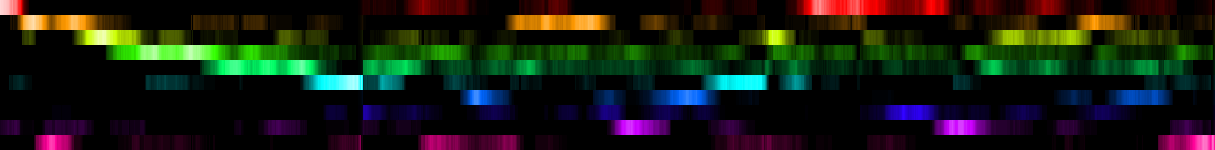

In [11]:
filename = "topicogramtest.png"
build_topigram(root, True, 60, 10, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=10, decay=0.5, chunksize=100)
[(0, u'0.054*"would" + 0.050*"provid" + 0.045*"access" + 0.045*"entir" + 0.043*"along" + 0.043*"mean" + 0.038*"basic" + 0.037*"way" + 0.036*"journey" + 0.034*"recommend"'), (1, u'0.069*"engin" + 0.057*"station" + 0.046*"dragon" + 0.042*"launch" + 0.036*"first" + 0.033*"space" + 0.033*"cargo" + 0.025*"ton" + 0.024*"depot" + 0.023*"good"'), (2, u'0.051*"time" + 0.046*"mission" + 0.042*"say" + 0.040*"mar" + 0.038*"go" + 0.031*"onli" + 0.030*"per" + 0.030*"need" + 0.024*"probabl" + 0.024*"improv"'), (3, u'0.047*"carbon" + 0.044*"fiber" + 0.026*"peopl" + 0.021*"look" + 0.021*"thing" + 0.021*"engin" + 0.021*"want" + 0.020*"make" + 0.017*"build" + 0.017*"like"'), (4, u'0.063*"system" + 0.042*"spaceship" + 0.040*"actual" + 0.038*"greater" + 0.036*"propel" + 0.027*"go" + 0.025*"orbit" + 0.025*"would" + 0.025*"full" + 0.023*"fill"'), (5, u'0.063*"becaus" + 0.052*"liquid" + 0.052*"oxygen" + 0.043*"use" + 0.037*"realli" + 0.031*"got

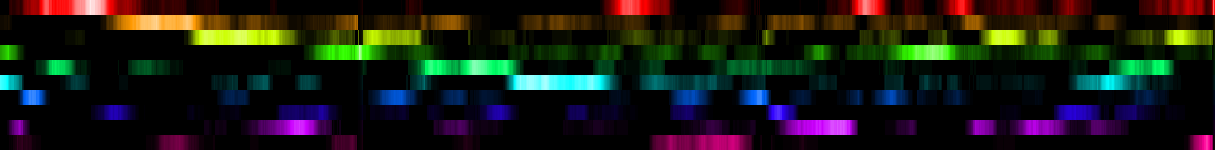

In [12]:
filename = "multiplanetary-species-60-10.png"
build_topigram(root, True, 60, 10, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=10, decay=0.5, chunksize=100)
[(0, u'0.147*"system" + 0.080*"solar" + 0.065*"engin" + 0.048*"anywher" + 0.032*"merlin" + 0.031*"veri" + 0.031*"realli" + 0.031*"provid" + 0.028*"big" + 0.027*"freedom"'), (1, u'0.053*"use" + 0.049*"give" + 0.034*"mar" + 0.032*"mission" + 0.027*"abl" + 0.025*"say" + 0.025*"need" + 0.022*"take" + 0.022*"probabl" + 0.021*"liquid"'), (2, u'0.053*"full" + 0.052*"along" + 0.045*"also" + 0.039*"launch" + 0.037*"perhap" + 0.037*"dragon" + 0.036*"fill" + 0.030*"actual" + 0.029*"tank" + 0.027*"rocket"'), (3, u'0.096*"want" + 0.079*"way" + 0.064*"anoth" + 0.056*"think" + 0.042*"could" + 0.041*"pluto" + 0.039*"elsewher" + 0.038*"realli" + 0.035*"got" + 0.023*"right"'), (4, u'0.102*"get" + 0.068*"lot" + 0.055*"saturn" + 0.051*"much" + 0.047*"fiber" + 0.046*"carbon" + 0.030*"ani" + 0.027*"year" + 0.026*"advanc" + 0.023*"quit"'), (5, u'0.075*"earth" + 0.075*"becaus" + 0.074*"mean" + 0.038*"like" + 0.036*"mar" + 0.026*"basic" + 0.025*

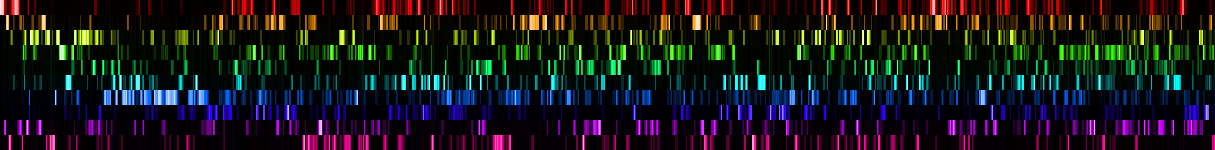

In [13]:
filename = "multiplanetary-species-5-10.png"
build_topigram(root, True, 5, 10, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=5, decay=0.5, chunksize=100)
[(0, u'0.024*"land" + 0.021*"dragon" + 0.021*"launch" + 0.019*"first" + 0.018*"booster" + 0.017*"realli" + 0.017*"space" + 0.016*"cargo" + 0.016*"lot" + 0.016*"make"'), (1, u'0.039*"engin" + 0.033*"make" + 0.021*"realli" + 0.020*"also" + 0.019*"merlin" + 0.017*"rocket" + 0.017*"propel" + 0.016*"vehicl" + 0.016*"get" + 0.016*"capabl"'), (2, u'0.049*"tank" + 0.046*"spaceship" + 0.023*"like" + 0.023*"mar" + 0.023*"realli" + 0.022*"actual" + 0.020*"well" + 0.019*"becaus" + 0.019*"get" + 0.017*"big"'), (3, u'0.038*"would" + 0.033*"mar" + 0.030*"time" + 0.030*"go" + 0.026*"propel" + 0.025*"mission" + 0.021*"think" + 0.020*"abl" + 0.019*"could" + 0.019*"cost"'), (4, u'0.064*"system" + 0.035*"solar" + 0.021*"greater" + 0.021*"want" + 0.020*"way" + 0.017*"carbon" + 0.017*"applaus" + 0.016*"fiber" + 0.015*"moon" + 0.015*"mean"')]


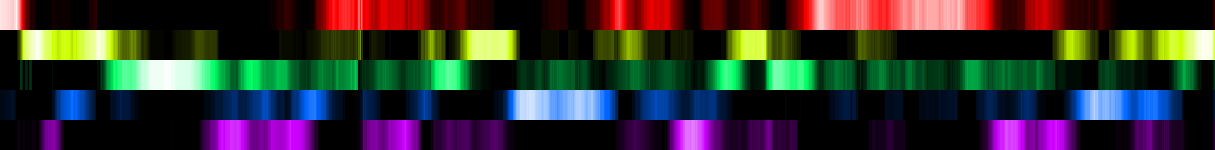

In [14]:
filename = "multiplanetary-species-60-10.png"
build_topigram(root, True, 60, 5, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=5, decay=0.5, chunksize=100)
[(0, u'0.067*"system" + 0.036*"solar" + 0.022*"greater" + 0.020*"way" + 0.020*"could" + 0.018*"anywher" + 0.017*"carbon" + 0.017*"actual" + 0.016*"fiber" + 0.016*"moon"'), (1, u'0.044*"go" + 0.037*"would" + 0.030*"mar" + 0.029*"propel" + 0.023*"say" + 0.022*"mean" + 0.022*"provid" + 0.022*"orbit" + 0.022*"mission" + 0.021*"full"'), (2, u'0.039*"station" + 0.032*"dragon" + 0.029*"first" + 0.023*"space" + 0.019*"make" + 0.017*"applaus" + 0.017*"ton" + 0.016*"time" + 0.015*"think" + 0.014*"tri"'), (3, u'0.041*"make" + 0.023*"use" + 0.023*"realli" + 0.021*"merlin" + 0.020*"veri" + 0.020*"also" + 0.019*"work" + 0.017*"raptor" + 0.017*"liquid" + 0.016*"becaus"'), (4, u'0.046*"engin" + 0.032*"spaceship" + 0.031*"tank" + 0.029*"booster" + 0.023*"realli" + 0.020*"well" + 0.019*"big" + 0.017*"land" + 0.017*"year" + 0.016*"get"')]


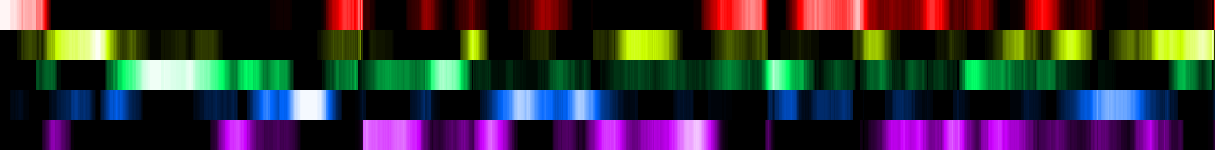

In [15]:
filename = "multiplanetary-species-60-5-higher-bars.png"
build_topigram(root, True, 60, 5, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=5, decay=0.5, chunksize=100)
[(0, u'0.032*"make" + 0.024*"size" + 0.024*"rocket" + 0.023*"pretti" + 0.022*"vehicl" + 0.021*"realli" + 0.020*"mar" + 0.016*"difficult" + 0.015*"methan" + 0.014*"system"'), (1, u'0.023*"dragon" + 0.022*"realli" + 0.021*"launch" + 0.019*"first" + 0.019*"go" + 0.017*"space" + 0.016*"cargo" + 0.015*"mayb" + 0.015*"station" + 0.015*"make"'), (2, u'0.039*"mar" + 0.032*"spaceship" + 0.029*"go" + 0.028*"propel" + 0.025*"would" + 0.025*"time" + 0.020*"could" + 0.016*"like" + 0.016*"becaus" + 0.016*"even"'), (3, u'0.041*"land" + 0.033*"engin" + 0.030*"get" + 0.029*"booster" + 0.028*"mission" + 0.027*"also" + 0.024*"realli" + 0.022*"one" + 0.019*"well" + 0.017*"structur"'), (4, u'0.041*"tank" + 0.034*"make" + 0.032*"carbon" + 0.031*"fiber" + 0.027*"engin" + 0.027*"merlin" + 0.021*"first" + 0.020*"liquid" + 0.019*"want" + 0.019*"oxygen"')]


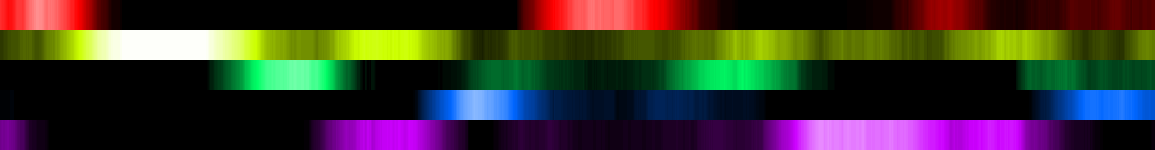

In [16]:
filename = "multiplanetary-species-60-5-text-cluster.png"
build_topigram(root, False, 60, 5, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=10, decay=0.5, chunksize=100)
[(0, u'0.048*"land" + 0.046*"booster" + 0.035*"get" + 0.033*"also" + 0.033*"raptor" + 0.032*"mission" + 0.027*"one" + 0.027*"realli" + 0.025*"well" + 0.021*"moon"'), (1, u'0.088*"dragon" + 0.029*"manag" + 0.026*"put" + 0.025*"piec" + 0.025*"hardest" + 0.023*"wing" + 0.022*"handl" + 0.021*"see" + 0.020*"later" + 0.020*"frame"'), (2, u'0.075*"launch" + 0.048*"cargo" + 0.047*"ship" + 0.031*"minut" + 0.024*"version" + 0.023*"go" + 0.023*"like" + 0.022*"mani" + 0.021*"realli" + 0.020*"last"'), (3, u'0.069*"make" + 0.044*"want" + 0.037*"merlin" + 0.034*"realli" + 0.030*"go" + 0.030*"becaus" + 0.029*"big" + 0.028*"thing" + 0.025*"work" + 0.024*"mar"'), (4, u'0.060*"first" + 0.035*"space" + 0.032*"station" + 0.026*"realli" + 0.021*"abl" + 0.021*"also" + 0.020*"applaus" + 0.019*"stage" + 0.018*"nasa" + 0.018*"thank"'), (5, u'0.075*"tank" + 0.070*"spaceship" + 0.060*"propel" + 0.036*"would" + 0.034*"time" + 0.025*"even" + 0.024*"f

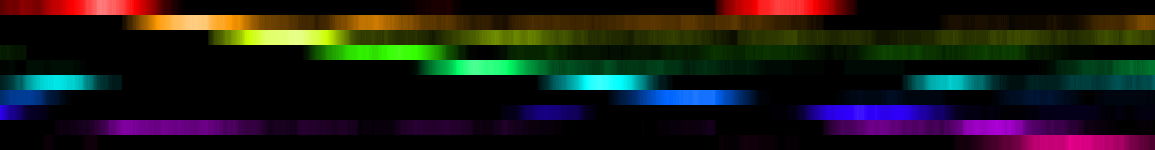

In [17]:
filename = "multiplanetary-species-60-10-text-cluster.png"
build_topigram(root, False, 60, 10, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=10, decay=0.5, chunksize=100)
[(0, u'0.054*"carbon" + 0.053*"fiber" + 0.044*"go" + 0.027*"anywher" + 0.024*"ship" + 0.023*"kind" + 0.021*"advanc" + 0.021*"say" + 0.020*"realli" + 0.017*"insid"'), (1, u'0.047*"booster" + 0.032*"get" + 0.031*"land" + 0.027*"well" + 0.026*"need" + 0.024*"mission" + 0.023*"frame" + 0.021*"base" + 0.019*"number" + 0.019*"site"'), (2, u'0.039*"go" + 0.025*"could" + 0.025*"station" + 0.021*"lot" + 0.020*"real" + 0.018*"establish" + 0.018*"reason" + 0.018*"fact" + 0.015*"think" + 0.014*"progress"'), (3, u'0.078*"would" + 0.048*"mar" + 0.041*"cost" + 0.040*"think" + 0.035*"peopl" + 0.032*"order" + 0.031*"less" + 0.027*"trip" + 0.027*"use" + 0.022*"per"'), (4, u'0.047*"make" + 0.037*"merlin" + 0.030*"want" + 0.026*"system" + 0.023*"mar" + 0.019*"realli" + 0.019*"becaus" + 0.018*"raptor" + 0.018*"big" + 0.017*"thing"'), (5, u'0.043*"first" + 0.039*"falcon" + 0.039*"land" + 0.034*"mission" + 0.022*"realli" + 0.019*"abl" + 0.017*

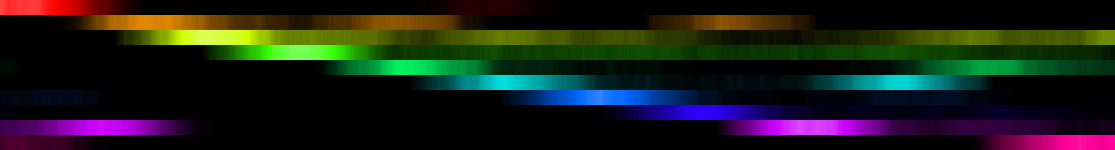

In [18]:
filename = "multiplanetary-species-100-10-text-cluster.png"
build_topigram(root, False, 100, 10, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=10, decay=0.5, chunksize=100)
[(0, u'0.061*"land" + 0.046*"oxygen" + 0.042*"veri" + 0.037*"depot" + 0.031*"back" + 0.030*"realli" + 0.027*"ton" + 0.025*"mayb" + 0.024*"rocket" + 0.022*"also"'), (1, u'0.064*"fiber" + 0.064*"carbon" + 0.031*"make" + 0.029*"first" + 0.024*"thing" + 0.023*"mold" + 0.022*"insid" + 0.022*"actual" + 0.022*"lay" + 0.022*"system"'), (2, u'0.054*"station" + 0.040*"applaus" + 0.037*"first" + 0.031*"space" + 0.024*"go" + 0.024*"launch" + 0.022*"fill" + 0.021*"think" + 0.017*"realli" + 0.016*"know"'), (3, u'0.050*"peopl" + 0.034*"take" + 0.029*"trip" + 0.026*"person" + 0.026*"refurbish" + 0.025*"probabl" + 0.023*"per" + 0.022*"mar" + 0.021*"think" + 0.020*"fair"'), (4, u'0.057*"merlin" + 0.050*"raptor" + 0.039*"realli" + 0.031*"make" + 0.024*"stage" + 0.024*"though" + 0.022*"base" + 0.021*"advanc" + 0.018*"first" + 0.018*"second"'), (5, u'0.051*"liquid" + 0.046*"mar" + 0.033*"real" + 0.032*"becaus" + 0.030*"work" + 0.026*"want" +

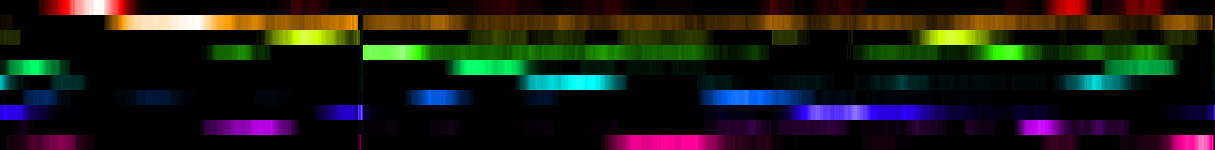

In [19]:
filename = "multiplanetary-species-100-10-time-cluster.png"
build_topigram(root, True, 100, 10, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=5, decay=0.5, chunksize=100)
[(0, u'0.029*"go" + 0.024*"make" + 0.024*"realli" + 0.023*"spaceship" + 0.023*"time" + 0.023*"dragon" + 0.022*"booster" + 0.016*"orbit" + 0.016*"ship" + 0.016*"mayb"'), (1, u'0.074*"system" + 0.039*"solar" + 0.023*"greater" + 0.021*"way" + 0.019*"applaus" + 0.019*"moon" + 0.016*"basic" + 0.016*"actual" + 0.015*"mean" + 0.015*"anywher"'), (2, u'0.037*"engin" + 0.030*"tank" + 0.026*"make" + 0.022*"realli" + 0.021*"use" + 0.018*"fiber" + 0.017*"oxygen" + 0.016*"becaus" + 0.016*"liquid" + 0.016*"carbon"'), (3, u'0.047*"mar" + 0.042*"propel" + 0.034*"would" + 0.024*"think" + 0.022*"go" + 0.020*"peopl" + 0.020*"cost" + 0.019*"per" + 0.019*"say" + 0.015*"order"'), (4, u'0.026*"first" + 0.026*"launch" + 0.021*"mission" + 0.020*"space" + 0.020*"land" + 0.016*"lot" + 0.016*"station" + 0.014*"abl" + 0.014*"ton" + 0.012*"think"')]


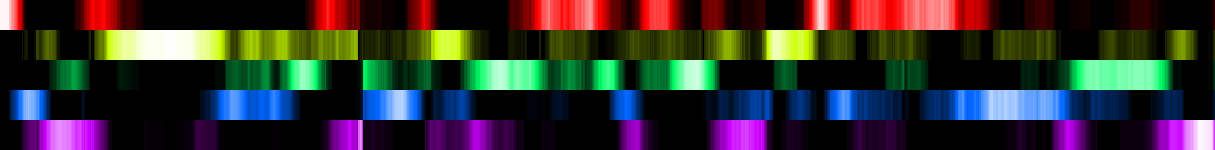

In [20]:
filename = "multiplanetary-species-60-5-10.png"
build_topigram(root, True, 60, 5, 20, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=5, decay=0.5, chunksize=100)
[(0, u'0.026*"launch" + 0.024*"land" + 0.024*"dragon" + 0.022*"first" + 0.020*"space" + 0.017*"booster" + 0.016*"ton" + 0.015*"station" + 0.014*"think" + 0.014*"cargo"'), (1, u'0.032*"spaceship" + 0.029*"use" + 0.027*"tank" + 0.023*"make" + 0.022*"realli" + 0.020*"actual" + 0.018*"would" + 0.018*"mayb" + 0.018*"becaus" + 0.016*"veri"'), (2, u'0.061*"system" + 0.032*"engin" + 0.032*"solar" + 0.019*"realli" + 0.019*"actual" + 0.019*"greater" + 0.017*"one" + 0.016*"applaus" + 0.015*"way" + 0.014*"anywher"'), (3, u'0.031*"make" + 0.028*"carbon" + 0.026*"fiber" + 0.021*"pressur" + 0.020*"thing" + 0.020*"sort" + 0.018*"want" + 0.017*"realli" + 0.016*"oxygen" + 0.015*"real"'), (4, u'0.048*"mar" + 0.043*"go" + 0.033*"propel" + 0.027*"time" + 0.022*"would" + 0.021*"think" + 0.019*"orbit" + 0.017*"mission" + 0.015*"say" + 0.015*"even"')]


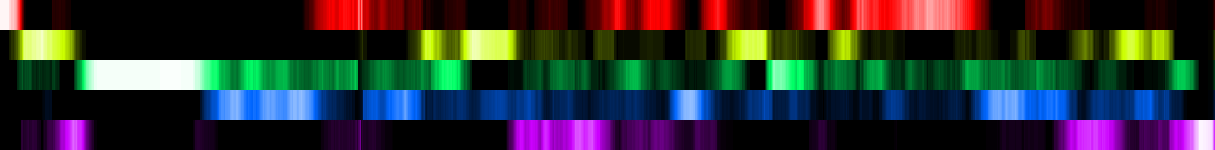

In [21]:
filename = "multiplanetary-species-60-5-50.png"
build_topigram(root, True, 60, 5, 50, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=5, decay=0.5, chunksize=100)
[(0, u'0.050*"would" + 0.031*"go" + 0.030*"time" + 0.028*"mar" + 0.028*"think" + 0.023*"orbit" + 0.023*"cost" + 0.020*"order" + 0.018*"could" + 0.018*"use"'), (1, u'0.030*"use" + 0.026*"oxygen" + 0.025*"mar" + 0.022*"carbon" + 0.021*"liquid" + 0.021*"pressur" + 0.020*"fiber" + 0.018*"need" + 0.018*"tank" + 0.018*"make"'), (2, u'0.028*"think" + 0.025*"engin" + 0.021*"realli" + 0.016*"start" + 0.015*"version" + 0.014*"launch" + 0.013*"mani" + 0.013*"go" + 0.013*"falcon" + 0.013*"applaus"'), (3, u'0.036*"system" + 0.023*"engin" + 0.022*"solar" + 0.018*"realli" + 0.016*"actual" + 0.014*"make" + 0.013*"get" + 0.012*"moon" + 0.012*"one" + 0.012*"mar"'), (4, u'0.032*"spaceship" + 0.026*"booster" + 0.021*"realli" + 0.019*"land" + 0.017*"first" + 0.017*"ship" + 0.016*"cargo" + 0.015*"vehicl" + 0.015*"actual" + 0.015*"make"')]


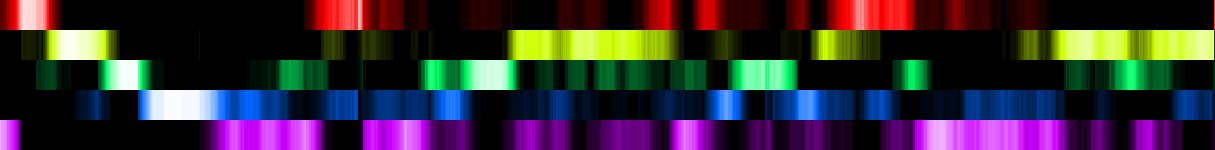

In [23]:
filename = "multiplanetary-species-60-5-200.png"
build_topigram(root, True, 60, 5, 200, filename)
ImageDisplay(filename=filename)